<div style="border:solid Chocolate 2px; padding: 40px">

<b> Сергей, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Определение стоимости автомобилей

## Описание проекта

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля. 
Постройте модель, которая умеет её определять. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.
Критерии, которые важны заказчику:
* качество предсказания;
* время обучения модели;
* время предсказания модели.

**Набор данных**
* DateCrawled — дата скачивания анкеты из базы
* VehicleType — тип автомобильного кузова
* RegistrationYear — год регистрации автомобиля
* Gearbox — тип коробки передач
* Power — мощность (л. с.)
* Model — модель автомобиля
* Kilometer — пробег (км)
* RegistrationMonth — месяц регистрации автомобиля
* FuelType — тип топлива
* Brand — марка автомобиля
* Repaired — была машина в ремонте или нет
* DateCreated — дата создания анкеты
* NumberOfPictures — количество фотографий автомобиля
* PostalCode — почтовый индекс владельца анкеты (пользователя)
* LastSeen — дата последней активности пользователя

Целевой признак
* Price — цена (евро)

**Цель исследования** 
* Сравнить характеристики моделей: время обучения, время предсказания, точность результата.
* Для оценки качества моделей применить метрику RMSE.
* Значение метрики RMSE должно быть меньше 2500.
* Найти лучшую модель для предсказания стоимости автомобиля.

**Ход исследования**
* Изучить данные. Заполнить пропущенные значения и обработайть аномалии в столбцах. Если среди признаков имеются неинформативные, удалить их.
* Подготовить выборки для обучения моделей.
* Обучить разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробовать разные гиперпараметры.
* Проанализировать время обучения, время предсказания и качество моделей.
* Опираясь на критерии заказчика, выберать лучшую модель, проверить её качество на тестовой выборке.

## Инструменты
* CatBoost
* LightGBM
* Matplotlib
* Numpy
* Pandas
* Scikit learn
* Scipy

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Подготовка данных

In [79]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from catboost import CatBoostRegressor
from scipy.stats import randint, uniform
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, OrdinalEncoder, PolynomialFeatures

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Я вижу, исполнение твоего кода начинается в ячейке с номером, который отличается от единицы. Перед отправкой проекта стоит проверять работоспособность кода — это можно сделать, нажав на панели Jupiter Hub ``Kernel`` и ``Restart & Run All`` (см скриншот ниже).

![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)
        
Важно также убедиться, что все ячейки проекта исполнились - можно просто пролистать работу до конца и убедиться, что последняя ячейка исполнена. Такая проверка поможет тебе убедиться, что твоё решение будет должным образом воспроизведено во время ревью или во время передачи его заказчику - это очень важный этап, пренебрегать которым не стоит:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Да, этого не делал из-за того, что в проекте есть ячейки с долгим временем выполнения. Перед отправкой сделаю)
</div>

In [2]:
pth1 = 'autos.csv'
pth2 = '/datasets/autos.csv'
    
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные загрузили.
    
При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')

Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
df.head()

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  2016-03-24 11:52:17    480         NaN              1993  manual      0   
1  2016-03-24 10:58:45  18300       coupe              2011  manual    190   
2  2016-03-14 12:52:21   9800         suv              2004    auto    163   
3  2016-03-17 16:54:04   1500       small              2001  manual     75   
4  2016-03-31 17:25:20   3600       small              2008  manual     69   

   Model  Kilometer  RegistrationMonth  FuelType       Brand Repaired  \
0   golf     150000                  0    petrol  volkswagen      NaN   
1    NaN     125000                  5  gasoline        audi      yes   
2  grand     125000                  8  gasoline        jeep      NaN   
3   golf     150000                  6    petrol  volkswagen       no   
4  fabia      90000                  7  gasoline       skoda       no   

           DateCreated  NumberOfPictures  PostalCode             LastSeen  
0  2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21

In [5]:
df.describe(include='all')

DateCrawled          Price VehicleType  RegistrationYear  \
count                354369  354369.000000      316879     354369.000000   
unique               271174            NaN           8               NaN   
top     2016-03-24 14:49:47            NaN       sedan               NaN   
freq                      7            NaN       91457               NaN   
mean                    NaN    4416.656776         NaN       2004.234448   
std                     NaN    4514.158514         NaN         90.227958   
min                     NaN       0.000000         NaN       1000.000000   
25%                     NaN    1050.000000         NaN       1999.000000   
50%                     NaN    2700.000000         NaN       2003.000000   
75%                     NaN    6400.000000         NaN       2008.000000   
max                     NaN   20000.000000         NaN       9999.000000   

       Gearbox          Power   Model      Kilometer  RegistrationMonth  \
count   334536  354369.000000  334664  354369.000000      354369.000000   
unique       2            NaN     250            NaN                NaN   
top     manual            NaN    golf            NaN                NaN   
freq    268251            NaN   29232            NaN                NaN   
mean       NaN     110.094337     NaN  128211.172535           5.714645   
std        NaN     189.850405     NaN   37905.341530           3.726421   
min        NaN       0.000000     NaN    5000.000000           0.000000   
25%        NaN      69.000000     NaN  125000.000000           3.000000   
50%        NaN     105.000000     NaN  150000.000000           6.000000   
75%        NaN     143.000000     NaN  150000.000000           9.000000   
max        NaN   20000.000000     NaN  150000.000000          12.000000   

       FuelType       Brand Repaired          DateCreated  NumberOfPictures  \
count    321474      354369   283215               354369          354369.0   
unique        7          40        2                  109               NaN   
top      petrol  volkswagen       no  2016-04-03 00:00:00               NaN   
freq     216352       77013   247161                13719               NaN   
mean        NaN         NaN      NaN                  NaN               0.0   
std         NaN         NaN      NaN                  NaN               0.0   
min         NaN         NaN      NaN                  NaN               0.0   
25%         NaN         NaN      NaN                  NaN               0.0   
50%         NaN         NaN      NaN                  NaN               0.0   
75%         NaN         NaN      NaN                  NaN               0.0   
max         NaN         NaN      NaN                  NaN               0.0   

           PostalCode             LastSeen  
count   354369.000000               354369  
unique            NaN               179150  
top               NaN  2016-04-06 13:45:54  
freq              NaN                   17  
mean     50508.689087                  NaN  
std      25783.096248                  NaN  
min       1067.000000                  NaN  
25%      30165.000000                  NaN  
50%      49413.000000                  NaN  
75%      71083.000000                  NaN  
max      99998.000000                  NaN

## Определение основных параметров

In [6]:
def general_info(column):
    print(df[column].value_counts())
    print('Количество пропусков:', df[column].isna().sum())

## DateCrawled

In [7]:
general_info('DateCrawled')

2016-03-24 14:49:47    7
2016-03-26 22:57:31    6
2016-03-19 21:49:56    6
2016-04-02 14:50:21    5
2016-03-23 13:50:19    5
                      ..
2016-03-20 16:48:06    1
2016-03-22 21:51:04    1
2016-03-11 16:25:36    1
2016-03-31 12:47:30    1
2016-03-19 18:57:12    1
Name: DateCrawled, Length: 271174, dtype: int64
Количество пропусков: 0


## Price

Количество пропусков: 0


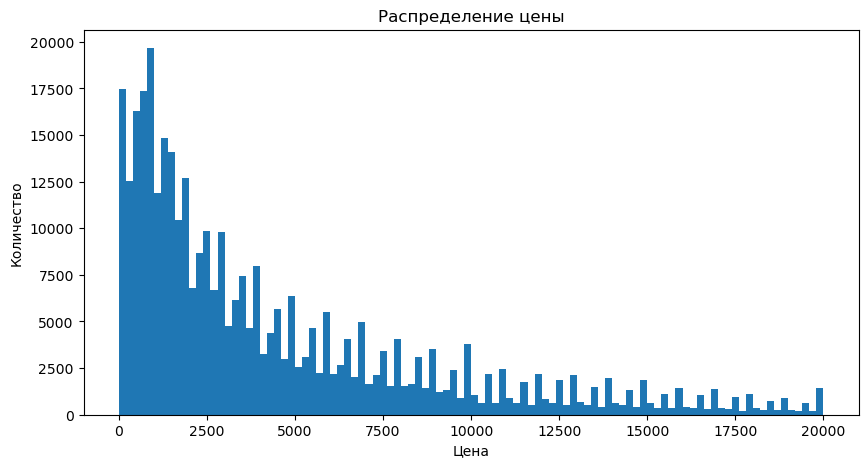

In [8]:
print('Количество пропусков:', df['Price'].isna().sum())
plt.figure(figsize=(10, 5))
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.hist(df['Price'], bins=100)
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Тут и далее на графиках нужно подписать оси Х и Y, а также названия.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

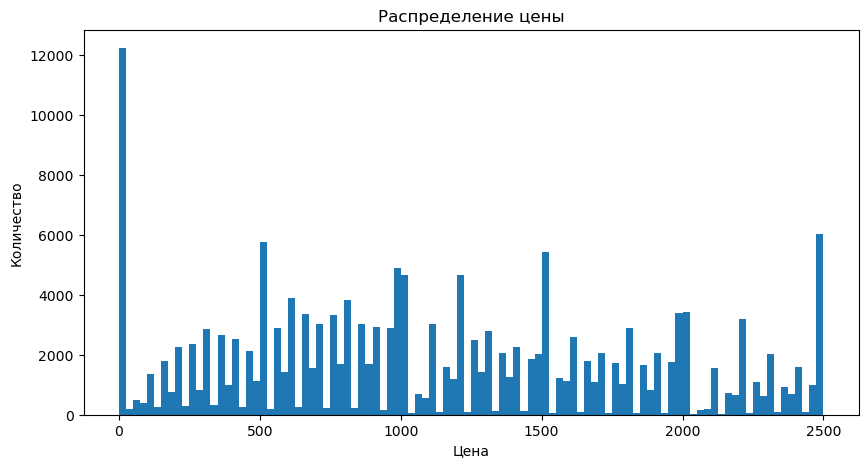

In [9]:
plt.figure(figsize=(10, 5))
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.hist(df['Price'], bins=100, range=(0, 2500))
plt.show()

In [10]:
print('Количество нулевых значений:', df[df['Price'] == 0]['Price'].count())

Количество нулевых значений: 10772


## VehicleType

In [11]:
general_info('VehicleType')

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64
Количество пропусков: 37490


In [12]:
df[df['VehicleType'].isna()].describe(include='all')

DateCrawled         Price VehicleType  RegistrationYear  \
count                 37490  37490.000000           0      37490.000000   
unique                36331           NaN           0               NaN   
top     2016-03-25 16:51:10           NaN         NaN               NaN   
freq                      3           NaN         NaN               NaN   
mean                    NaN   2375.427954         NaN       2021.098773   
std                     NaN   3213.002249         NaN        276.173531   
min                     NaN      0.000000         NaN       1000.000000   
25%                     NaN    400.000000         NaN       2005.000000   
50%                     NaN   1199.000000         NaN       2016.000000   
75%                     NaN   2999.000000         NaN       2017.000000   
max                     NaN  20000.000000         NaN       9999.000000   

       Gearbox         Power  Model      Kilometer  RegistrationMonth  \
count    27520  37490.000000  30662   37490.000000       37490.000000   
unique       2           NaN    241            NaN                NaN   
top     manual           NaN   golf            NaN                NaN   
freq     23522           NaN   4035            NaN                NaN   
mean       NaN     70.569592    NaN  127180.848226           3.841211   
std        NaN    216.707321    NaN   43882.411412           4.043364   
min        NaN      0.000000    NaN    5000.000000           0.000000   
25%        NaN      0.000000    NaN  125000.000000           0.000000   
50%        NaN     61.000000    NaN  150000.000000           3.000000   
75%        NaN    105.000000    NaN  150000.000000           7.000000   
max        NaN  16011.000000    NaN  150000.000000          12.000000   

       FuelType       Brand Repaired          DateCreated  NumberOfPictures  \
count     20195       37490    16919                37490           37490.0   
unique        7          40        2                   64               NaN   
top      petrol  volkswagen       no  2016-03-20 00:00:00               NaN   
freq      14807        9710    13027                 1380               NaN   
mean        NaN         NaN      NaN                  NaN               0.0   
std         NaN         NaN      NaN                  NaN               0.0   
min         NaN         NaN      NaN                  NaN               0.0   
25%         NaN         NaN      NaN                  NaN               0.0   
50%         NaN         NaN      NaN                  NaN               0.0   
75%         NaN         NaN      NaN                  NaN               0.0   
max         NaN         NaN      NaN                  NaN               0.0   

          PostalCode             LastSeen  
count   37490.000000                37490  
unique           NaN                32537  
top              NaN  2016-04-06 04:16:06  
freq             NaN                    6  
mean    47964.240891                  NaN  
std     25613.384004                  NaN  
min      1067.000000                  NaN  
25%     27392.750000                  NaN  
50%     46119.000000                  NaN  
75%     66499.250000                  NaN  
max     99998.000000                  NaN

## RegistrationYear

In [13]:
general_info('RegistrationYear')

2000    24490
1999    22728
2005    22109
2001    20124
2006    19900
        ...  
6500        1
2290        1
1001        1
9450        1
3500        1
Name: RegistrationYear, Length: 151, dtype: int64
Количество пропусков: 0


## Gearbox

In [14]:
general_info('Gearbox')

manual    268251
auto       66285
Name: Gearbox, dtype: int64
Количество пропусков: 19833


## Power

In [15]:
general_info('Power')

0       40225
75      24023
60      15897
150     14590
101     13298
        ...  
610         1
6006        1
5815        1
6018        1
1241        1
Name: Power, Length: 712, dtype: int64
Количество пропусков: 0


## Model

In [16]:
general_info('Model')

golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: Model, Length: 250, dtype: int64
Количество пропусков: 19705


## Kilometer

150000    238209
125000     36454
100000     14882
90000      11567
80000      10047
70000       8593
60000       7444
5000        6397
50000       6232
40000       4911
30000       4436
20000       3975
10000       1222
Name: Kilometer, dtype: int64
Количество пропусков: 0


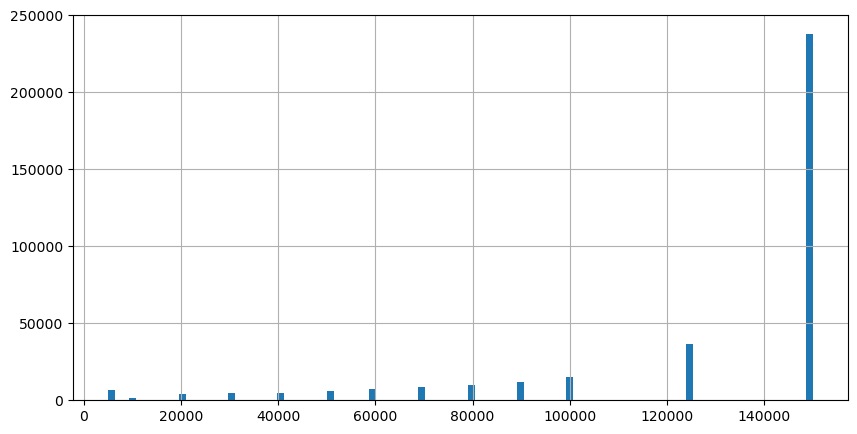

In [17]:
general_info('Kilometer')
df['Kilometer'].hist(bins=100, figsize=(10, 5));

## RegistrationMonth

In [18]:
general_info('RegistrationMonth')

0     37352
3     34373
6     31508
4     29270
5     29153
7     27213
10    26099
12    24289
11    24186
9     23813
1     23219
8     22627
2     21267
Name: RegistrationMonth, dtype: int64
Количество пропусков: 0


## FuelType

In [19]:
general_info('FuelType')

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64
Количество пропусков: 32895


## Brand

In [20]:
general_info('Brand')

volkswagen        77013
opel              39931
bmw               36914
mercedes_benz     32046
audi              29456
ford              25179
renault           17927
peugeot           10998
fiat               9643
seat               6907
mazda              5615
skoda              5500
smart              5246
citroen            5148
nissan             4941
toyota             4606
hyundai            3587
sonstige_autos     3374
volvo              3210
mini               3202
mitsubishi         3022
honda              2817
kia                2465
suzuki             2323
alfa_romeo         2314
chevrolet          1754
chrysler           1439
dacia               900
daihatsu            806
subaru              762
porsche             758
jeep                677
trabant             589
land_rover          545
daewoo              542
saab                526
jaguar              505
rover               486
lancia              471
lada                225
Name: Brand, dtype: int64
Количество про

## Repaired

In [21]:
general_info('Repaired') 

no     247161
yes     36054
Name: Repaired, dtype: int64
Количество пропусков: 71154


## DateCreated

In [22]:
general_info('DateCreated')

2016-04-03 00:00:00    13719
2016-04-04 00:00:00    13317
2016-03-20 00:00:00    12918
2016-03-12 00:00:00    12840
2016-03-21 00:00:00    12691
                       ...  
2015-08-07 00:00:00        1
2015-12-27 00:00:00        1
2015-11-12 00:00:00        1
2015-12-06 00:00:00        1
2015-06-18 00:00:00        1
Name: DateCreated, Length: 109, dtype: int64
Количество пропусков: 0


## NumberOfPictures

In [23]:
general_info('NumberOfPictures')

0    354369
Name: NumberOfPictures, dtype: int64
Количество пропусков: 0


## PostalCode

In [24]:
general_info('PostalCode')

10115    819
65428    613
66333    343
32257    317
44145    317
        ... 
91801      1
31097      1
82444      1
94359      1
31096      1
Name: PostalCode, Length: 8143, dtype: int64
Количество пропусков: 0


## LastSeen

In [25]:
general_info('LastSeen')

2016-04-06 13:45:54    17
2016-04-07 09:45:10    16
2016-04-06 01:15:23    16
2016-04-06 10:15:26    16
2016-04-07 05:44:30    16
                       ..
2016-03-07 17:46:17     1
2016-03-10 07:49:15     1
2016-04-03 04:18:11     1
2016-03-16 20:19:54     1
2016-03-21 10:42:49     1
Name: LastSeen, Length: 179150, dtype: int64
Количество пропусков: 0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные осмотрели.

### Анализ аномалий

#### Цена

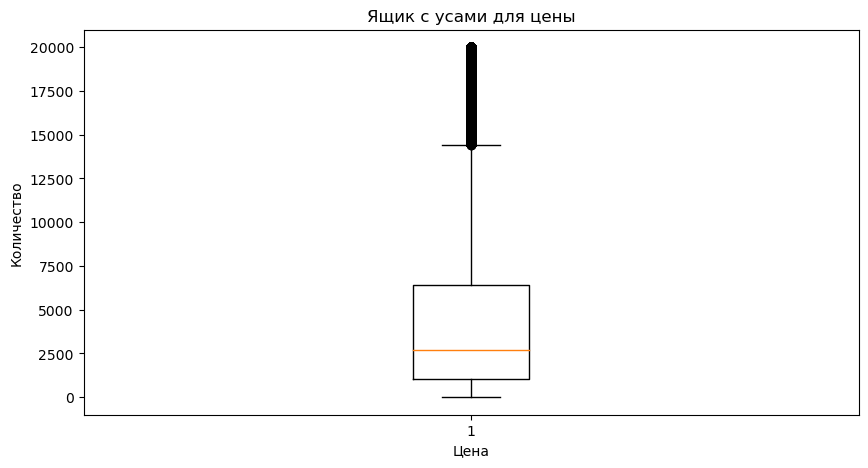

In [26]:
plt.figure(figsize=(10, 5))
plt.title('Ящик с усами для цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.boxplot(df['Price'])
plt.show()

In [27]:
df['Price'].describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: Price, dtype: float64

In [28]:
df[df['Price'] == 0]['Price'].count()

10772

In [29]:
df['Price'].quantile(0.04)

100.0

In [30]:
df[df['Price'] < 100]['Price'].count()

13314

In [31]:
df['Price'].quantile(0.96)

15499.0

In [32]:
df[df['Price'] > 15499]['Price'].count()

14095

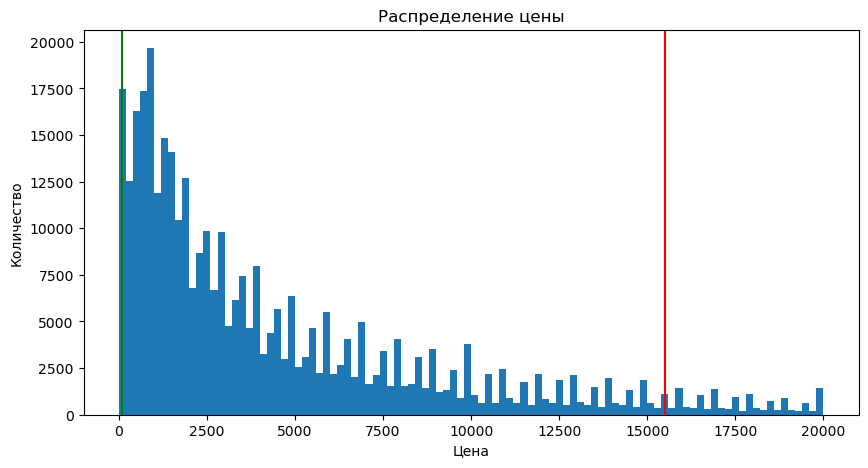

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.hist(df['Price'], bins=100)
plt.axvline(df['Price'].quantile(0.96), color='red')
plt.axvline(df['Price'].quantile(0.04), color='green')
plt.show()


In [34]:
df = df[df['Price'] != 0]

#### Год регистрации

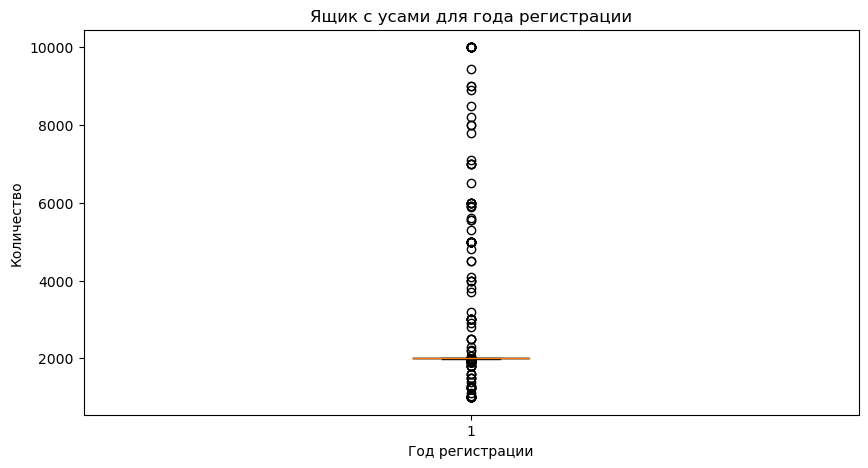

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Ящик с усами для года регистрации')
plt.xlabel('Год регистрации')
plt.ylabel('Количество')
plt.boxplot(df['RegistrationYear'])
plt.show()

In [36]:
df[df['RegistrationYear'] < 1900]['RegistrationYear'].count()

53

In [37]:
df[df['RegistrationYear'] > 2023]['RegistrationYear'].count()

86

In [38]:
df = df[(df['RegistrationYear'] >= 1900) & (df['RegistrationYear'] <= 2023)]

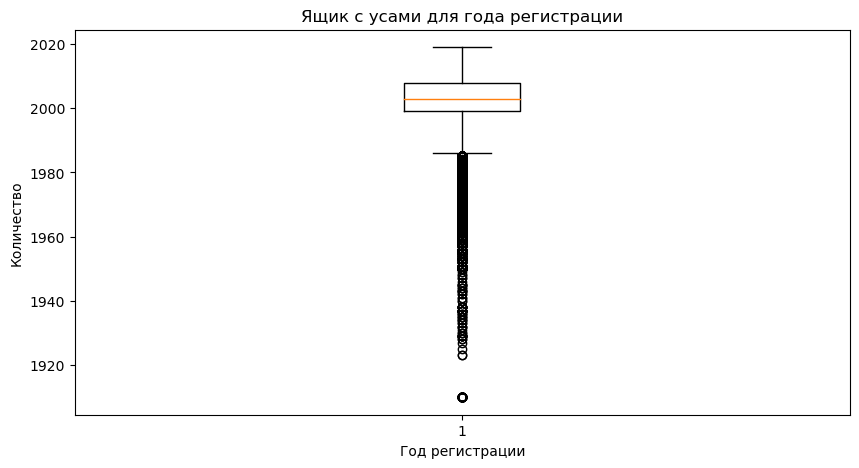

In [39]:
plt.figure(figsize=(10, 5))
plt.title('Ящик с усами для года регистрации')
plt.xlabel('Год регистрации')
plt.ylabel('Количество')
plt.boxplot(df['RegistrationYear'])
plt.show()

#### Мощность

In [40]:
df['Power'].describe()

count    343458.000000
mean        110.981838
std         187.860164
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64

In [41]:
df = df[(df['Power'] >= 10) & (df['Power'] <= 1500)]

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Нужно проанализировать на предмет аномалий признаки `price`, `RegistrationYear` и `power` и избавиться от аномалий.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

## Обработка дубликатов

In [42]:
# Проверим дубликаты
print(df.duplicated().sum())

# Удалим дубликаты
df = df.drop_duplicates().reset_index(drop=True)

4


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Найдены и удалены дубликаты.

### Корреляция

In [43]:
df.corr()

/var/folders/70/k39t_x2d08g08hls8fkylcyr0000gn/T/ipykernel_5586/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Price  RegistrationYear     Power  Kilometer  \
Price              1.000000          0.421483  0.465970  -0.385609   
RegistrationYear   0.421483          1.000000  0.100780  -0.252448   
Power              0.465970          0.100780  1.000000   0.092788   
Kilometer         -0.385609         -0.252448  0.092788   1.000000   
RegistrationMonth  0.071998          0.026869  0.040018  -0.015459   
NumberOfPictures        NaN               NaN       NaN        NaN   
PostalCode         0.064693          0.020056  0.048957  -0.010604   

                   RegistrationMonth  NumberOfPictures  PostalCode  
Price                       0.071998               NaN    0.064693  
RegistrationYear            0.026869               NaN    0.020056  
Power                       0.040018               NaN    0.048957  
Kilometer                  -0.015459               NaN   -0.010604  
RegistrationMonth           1.000000               NaN    0.003195  
NumberOfPictures                 NaN               NaN         NaN  
PostalCode                  0.003195               NaN    1.000000

RegistrationMonth и PostalCode практически не влияют на цену автомобиля. Удалим эти столбцы.

# Подготовка признаков и Pipeline

In [44]:
X = df.drop(["Price", "DateCrawled", "DateCreated", "LastSeen", "NumberOfPictures", "RegistrationMonth", "PostalCode"], axis=1)
y = df['Price']

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Удалена часть лишних признаков.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Давай подумаем о том, как на ценообразование влияют призаки `PostalCode` и `RegistrationMonth`?

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

In [45]:
# создадим валидационную и тестовую выборки
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12345)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=12345)

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

In [46]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
У `OneHotEncoder` обязательно нужно настраивать параметр `drop='first'` (или другой, в зависимости от задачи) при использовании линейных моделей, чтобы в трансформированной матрице не было мультиколлинеарности и чтобы не попасть в дамми-ловушку: https://www.codecamp.ru/blog/dummy-variable-trap/.
    
Может понадобиться обновление библиотеки `sklearn`, так как в ранних версиях параметры `handle_unknown` и `drop` конфликтовали друг с другом, но в актуальной версии библиотеки такой проблемы нет.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Да, бональная ошибка, спасибо!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Для древесных моделей и моделей на бустингах не стоит использовать `OneHotEncoder()` или его аналог `get_dummies()`: эта техника кодирования увеличивает количество признаков, в результате чего модели сложнее создавать разделяющие правила, поэтому время работы и расчётные характеристики моделей сильно страдают на больших наборах данных. Вместо этого нужно использовать `OrdinalEncoder()` - эта техника кодирует категориальные признаки так, что с ними удобнее работать в ходе создания разделяющих правил. 
    
Для бустинговых алгоритмов альетрнатинва - использование внутренних кодировщиков, которые работают лучше сторонних. В случае `CatBoost` за это отвечает параметр `cat_features`. В случае `LightGBM` можно привести эти категориальные признаки к типу `category`, тогда модель будет работать с категориальными признаками автоматически.

In [47]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

<div class="alert alert-success">
<h2> Комментарий тимлида ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый объект - так твоё решение будет более гибким и масштабируемым. 

## Подбор гиперпараметров моделей

### LinearRegression

In [173]:
lr = Ridge(fit_intercept=True)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

При использовании моделей (кроме линейной регрессии) важно настроить параметр `random_state`, чтобы результаты работы над проектом были воспроизводимы при его перезапуске.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

In [174]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lr', lr)
])

lr_param_grid = {
    'lr__alpha': np.logspace(-6, 6, 13),
}

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Гипрепараметр `fit_intercept` должен быть настроен во время инициализации модели в зависимости от того, как подготовлены данные. О том, как правильно выполнить настройку, смотри в документации модели.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Не знал, поправил)
</div>

In [175]:
lr_grid = RandomizedSearchCV(lr_pipeline, 
                   lr_param_grid, 
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=8, 
                   verbose=2)

In [176]:
%%time
lr_fitted = lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................................lr__alpha=10.0; total time=   1.0s
[CV] END .....................................lr__alpha=10.0; total time=   1.0s
[CV] END .....................................lr__alpha=10.0; total time=   1.0s
[CV] END .....................................lr__alpha=10.0; total time=   1.0s
[CV] END .....................................lr__alpha=10.0; total time=   1.0s
[CV] END ....................................lr__alpha=1e-06; total time=   1.1s
[CV] END ....................................lr__alpha=1e-06; total time=   1.1s
[CV] END ....................................lr__alpha=1e-06; total time=   1.2s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ....................................lr__alpha=1e-06; total time=   1.0s
[CV] END .....................................lr__alpha=0.01; total time=   0.9s
[CV] END ....................................lr__alpha=1e-06; total time=   1.1s
[CV] END .....................................lr__alpha=0.01; total time=   1.0s
[CV] END .....................................lr__alpha=0.01; total time=   0.9s
[CV] END .....................................lr__alpha=0.01; total time=   1.0s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END .....................................lr__alpha=0.01; total time=   0.9s
[CV] END ....................................lr__alpha=0.001; total time=   1.0s
[CV] END ....................................lr__alpha=0.001; total time=   1.0s
[CV] END ....................................lr__alpha=0.001; total time=   0.9s
[CV] END ....................................lr__alpha=0.001; total time=   1.0s
[CV] END ....................................lr__alpha=0.001; total time=   0.9s
[CV] END ....................................lr__alpha=1e-05; total time=   1.0s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ....................................lr__alpha=1e-05; total time=   1.0s
[CV] END ....................................lr__alpha=1e-05; total time=   1.0s
[CV] END ....................................lr__alpha=1e-05; total time=   1.0s
[CV] END ................................lr__alpha=1000000.0; total time=   0.4s
[CV] END ................................lr__alpha=1000000.0; total time=   0.4s
[CV] END ................................lr__alpha=1000000.0; total time=   0.5s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ................................lr__alpha=1000000.0; total time=   0.4s
[CV] END ................................lr__alpha=1000000.0; total time=   0.5s
[CV] END ....................................lr__alpha=1e-05; total time=   0.9s
[CV] END ...................................lr__alpha=1000.0; total time=   0.6s
[CV] END ...................................lr__alpha=1000.0; total time=   0.5s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ...................................lr__alpha=1000.0; total time=   0.5s
[CV] END ...................................lr__alpha=1000.0; total time=   0.6s
[CV] END ...................................lr__alpha=1000.0; total time=   0.5s
[CV] END ...................................lr__alpha=0.0001; total time=   0.9s
[CV] END ...................................lr__alpha=0.0001; total time=   1.0s
[CV] END ...................................lr__alpha=0.0001; total time=   1.0s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ...................................lr__alpha=0.0001; total time=   1.0s
[CV] END ...................................lr__alpha=0.0001; total time=   1.0s
[CV] END ......................................lr__alpha=0.1; total time=   0.9s
[CV] END ......................................lr__alpha=0.1; total time=   0.9s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END ......................................lr__alpha=0.1; total time=   0.9s
[CV] END .................................lr__alpha=100000.0; total time=   0.5s
[CV] END .................................lr__alpha=100000.0; total time=   0.5s
[CV] END .................................lr__alpha=100000.0; total time=   0.5s
[CV] END .................................lr__alpha=100000.0; total time=   0.4s
[CV] END ......................................lr__alpha=0.1; total time=   0.9s
[CV] END ......................................lr__alpha=0.1; total time=   0.9s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END .................................lr__alpha=100000.0; total time=   0.4s
CPU times: user 2.75 s, sys: 411 ms, total: 3.16 s
Wall time: 8.21 s


In [177]:
%%time
lr_predict = lr_fitted.predict(X_valid)

CPU times: user 34.4 ms, sys: 3.66 ms, total: 38.1 ms
Wall time: 37.4 ms


In [178]:
lr_rmse = mean_squared_error(y_valid, lr_predict) ** 0.5
print('LR RMSE:', lr_rmse)
print("Лучшие параметры:", lr_grid.best_params_)

LR RMSE: 2745.991602992436
Лучшие параметры: {'lr__alpha': 0.01}


LR RMSE: 2745.991602992436

Лучшие параметры: {'lr__alpha': 0.01}

### Random Forest Regressor

In [179]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

rfr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfr', rfr)
])

rfr_param_grid = {
    'rfr__n_estimators': [100, 200],
    'rfr__max_depth': [None] + [i for i in range(2, 7)],
    'rfr__min_samples_leaf': [1, 2]
}

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Для гиперпараметра `max_depth` рассматривается очень длинная последовательность: деревья с большой глубиной склонны к переобучению, а обучаются и предсказывают результат они дольше, поэтому делать их слишком глубокими не стоит - оптимальное значение почти всегда лежит в диапазоне от 2 до 5-6. Кроме того, можно попробовать значение `None` - в итоге оптимальная последовательность может выглядеть как `[None] + [i for i in range(2, 7)]`.
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Потестим
</div>

In [180]:
rfr_grid = RandomizedSearchCV(rfr_pipeline, 
                   rfr_param_grid, 
                   random_state=42,
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=8, 
                   verbose=2)

In [181]:
%%time
rfr_fitted = rfr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=   9.8s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  10.2s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  10.1s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  10.1s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  10.0s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  16.6s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  16.6s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  17.8s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  16.8s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=  17.9s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  20.2s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  20.8s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  20.4s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  20.9s
[CV] END rfr__max_depth=5, rfr__min_samples_leaf=2, rfr__n_estimators=100; total time=  20.9s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  20.5s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  20.5s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  20.6s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  20.9s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=2, rfr__n_estimators=200; total time=  22.5s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  20.7s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  21.0s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  21.8s


/Users/vs/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  20.5s
[CV] END rfr__max_depth=3, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  21.3s
[CV] END rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  27.2s
[CV] END rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  27.3s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  27.0s
[CV] END rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  27.4s
[CV] END rfr__max_depth=4, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  28.4s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=15.3min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=15.3min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=15.3min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=15.2min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=100; total time=15.3min
[CV] END rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  43.5s
[CV] END rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  46.2s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  49.2s
[CV] END rfr__max_depth=2, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  14.4s
[CV] END rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  44.4s
[CV] END rfr__max_depth=2, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  14.6s
[CV] END rfr__max_depth=6, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  45.1s
[CV] END rfr__max_depth=2, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  14.8s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=2, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  16.4s
[CV] END rfr__max_depth=2, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=  17.7s
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=25.7min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=27.4min


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=27.4min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=16.8min
[CV] END rfr__max_depth=None, rfr__min_samples_leaf=1, rfr__n_estimators=200; total time=16.8min
CPU times: user 47min 3s, sys: 9.38 s, total: 47min 12s
Wall time: 37min 24s


In [182]:
%%time
rfr_predict = rfr_fitted.predict(X_valid)

CPU times: user 2.67 s, sys: 149 ms, total: 2.82 s
Wall time: 347 ms


In [184]:
rfr_rmse = mean_squared_error(y_valid, rfr_predict) ** 0.5
print('RFR RMSE:', rfr_rmse)
print("Лучшие параметры:", rfr_grid.best_params_)

RFR RMSE: 1552.188305613231
Лучшие параметры: {'rfr__n_estimators': 200, 'rfr__min_samples_leaf': 1, 'rfr__max_depth': None}


RFR RMSE: 1552.188305613231

Лучшие параметры: {'rfr__n_estimators': 200, 'rfr__min_samples_leaf': 1, 'rfr__max_depth': None}

### K Neighbors Regressor

In [187]:
knr = KNeighborsRegressor()

knr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knr', knr)
])

knr_param_grid = {
}

knr_grid = RandomizedSearchCV(knr_pipeline, 
                   knr_param_grid, 
                   random_state=42,
                   cv=10, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=-1, 
                   verbose=2)

In [188]:
%%time
knr_fitted = knr_grid.fit(X_train, y_train)

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END .................................................... total time= 5.5min
[CV] END .................................................... total time= 5.5min
[CV] END .................................................... total time= 5.5min
[CV] END .................................................... total time= 5.5min
[CV] END .................................................... total time= 5.5min
[CV] END .................................................... total time= 5.5min
[CV] END .................................................... total time= 5.5min
[CV] END .................................................... total time= 5.5min
[CV] END .................................................... total time= 5.5min
[CV] END .................................................... total time= 5.5min
CPU times: user 738 ms, sys: 176 ms, total: 914 ms
Wall time: 5min 31s


In [189]:
%%time
knr_predict = knr_fitted.predict(X_valid)

CPU times: user 7min 14s, sys: 1.18 s, total: 7min 15s
Wall time: 45.7 s


In [190]:
knr_rmse = mean_squared_error(y_valid, knr_predict) ** 0.5
print('KNR RMSE:', knr_rmse)

KNR RMSE: 1753.6664253237252


KNR RMSE: 1753.6664253237252

### LightGBM

In [191]:
lgbm = lgb.LGBMRegressor(random_state=42)

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgbm', lgbm)
])

lgbm_param_grid = {
    'lgbm__num_leaves': randint(6, 50),
    'lgbm__min_child_samples': randint(100, 500),
    'lgbm__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'lgbm__subsample': uniform(loc=0.2, scale=0.8),
    'lgbm__colsample_bytree': uniform(loc=0.4, scale=0.6),
    'lgbm__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'lgbm__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'lgbm__n_estimators': [100, 200, 500, 1000, 2000]
}

lgbm_grid = RandomizedSearchCV(lgbm_pipeline, 
                   lgbm_param_grid, 
                   random_state=42,
                   cv=2, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=8, 
                   verbose=2)

In [192]:
%%time
lgbm_fitted = lgbm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.9631316254094501, lgbm__learning_rate=0.05, lgbm__min_child_samples=291, lgbm__min_child_weight=1, lgbm__n_estimators=100, lgbm__num_leaves=17, lgbm__reg_alpha=7, lgbm__reg_lambda=10, lgbm__subsample=0.5455560149136927; total time=   1.5s
[CV] END lgbm__colsample_bytree=0.9631316254094501, lgbm__learning_rate=0.05, lgbm__min_child_samples=291, lgbm__min_child_weight=1, lgbm__n_estimators=100, lgbm__num_leaves=17, lgbm__reg_alpha=7, lgbm__reg_lambda=10, lgbm__subsample=0.5455560149136927; total time=   1.5s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_enco

[CV] END lgbm__colsample_bytree=0.5747374841188252, lgbm__learning_rate=0.1, lgbm__min_child_samples=269, lgbm__min_child_weight=0.01, lgbm__n_estimators=1000, lgbm__num_leaves=8, lgbm__reg_alpha=5, lgbm__reg_lambda=1, lgbm__subsample=0.7442460308702239; total time=   6.3s
[CV] END lgbm__colsample_bytree=0.5747374841188252, lgbm__learning_rate=0.1, lgbm__min_child_samples=269, lgbm__min_child_weight=0.01, lgbm__n_estimators=1000, lgbm__num_leaves=8, lgbm__reg_alpha=5, lgbm__reg_lambda=1, lgbm__subsample=0.7442460308702239; total time=   6.4s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.4348501673009197, lgbm__learning_rate=1, lgbm__min_child_samples=199, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=27, lgbm__reg_alpha=5, lgbm__reg_lambda=0.1, lgbm__subsample=0.7775990178134597; total time=   9.8s
[CV] END lgbm__colsample_bytree=0.4348501673009197, lgbm__learning_rate=1, lgbm__min_child_samples=199, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=27, lgbm__reg_alpha=5, lgbm__reg_lambda=0.1, lgbm__subsample=0.7775990178134597; total time=   9.8s


/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.6702995511817258, lgbm__learning_rate=0.05, lgbm__min_child_samples=487, lgbm__min_child_weight=10000.0, lgbm__n_estimators=1000, lgbm__num_leaves=19, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.1, lgbm__subsample=0.4436910153386966; total time=   9.7s
[CV] END lgbm__colsample_bytree=0.6702995511817258, lgbm__learning_rate=0.05, lgbm__min_child_samples=487, lgbm__min_child_weight=10000.0, lgbm__n_estimators=1000, lgbm__num_leaves=19, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.1, lgbm__subsample=0.4436910153386966; total time=   9.7s
[CV] END lgbm__colsample_bytree=0.5093416526728374, lgbm__learning_rate=0.5, lgbm__min_child_samples=101, lgbm__min_child_weight=10.0, lgbm__n_estimators=200, lgbm__num_leaves=9, lgbm__reg_alpha=7, lgbm__reg_lambda=10, lgbm__subsample=0.9756677022116469; total time=   1.6s
[CV] END lgbm__colsample_bytree=0.5093416526728374, lgbm__learning_rate=0.5, lgbm__min_child_samples=101, lgbm__min_child_weight=10.0, lgbm__n_estimators=200, l

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_enco

[CV] END lgbm__colsample_bytree=0.8633468615779945, lgbm__learning_rate=0.5, lgbm__min_child_samples=235, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=22, lgbm__reg_alpha=50, lgbm__reg_lambda=1, lgbm__subsample=0.8321404324249646; total time=   7.7s
[CV] END lgbm__colsample_bytree=0.8633468615779945, lgbm__learning_rate=0.5, lgbm__min_child_samples=235, lgbm__min_child_weight=1000.0, lgbm__n_estimators=500, lgbm__num_leaves=22, lgbm__reg_alpha=50, lgbm__reg_lambda=1, lgbm__subsample=0.8321404324249646; total time=   7.8s
[CV] END lgbm__colsample_bytree=0.7238152794334478, lgbm__learning_rate=0.05, lgbm__min_child_samples=316, lgbm__min_child_weight=10000.0, lgbm__n_estimators=2000, lgbm__num_leaves=20, lgbm__reg_alpha=0, lgbm__reg_lambda=0, lgbm__subsample=0.9895095492804138; total time=  18.7s
[CV] END lgbm__colsample_bytree=0.7238152794334478, lgbm__learning_rate=0.05, lgbm__min_child_samples=316, lgbm__min_child_weight=10000.0, lgbm__n_estimators=2000, lgb

In [193]:
%%time
lgbm_predict = lgbm_fitted.predict(X_valid)

CPU times: user 1.5 s, sys: 243 ms, total: 1.75 s
Wall time: 197 ms


In [194]:
lgbm_rmse = mean_squared_error(y_valid, lgbm_predict) ** 0.5
print('LGBM RMSE:', lgbm_rmse)
print("Лучшие параметры:", lgbm_grid.best_params_)

LGBM RMSE: 1600.5246373727934
Лучшие параметры: {'lgbm__colsample_bytree': 0.45860326840383037, 'lgbm__learning_rate': 0.5, 'lgbm__min_child_samples': 191, 'lgbm__min_child_weight': 100.0, 'lgbm__n_estimators': 1000, 'lgbm__num_leaves': 13, 'lgbm__reg_alpha': 1, 'lgbm__reg_lambda': 20, 'lgbm__subsample': 0.5128484860585927}


LGBM RMSE: 1600.5246373727934

Лучшие параметры: {'lgbm__colsample_bytree': 0.45860326840383037, 
'lgbm__learning_rate': 0.5, 
'lgbm__min_child_samples': 191, 
'lgbm__min_child_weight': 100.0, 
'lgbm__n_estimators': 1000, 
'lgbm__num_leaves': 13, 
'lgbm__reg_alpha': 1, 
'lgbm__reg_lambda': 20, 
'lgbm__subsample': 0.5128484860585927}

### CatBoost Regressor

In [59]:
cbr = CatBoostRegressor()

cbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cbr', cbr)
])

cbr_param_grid = {
    'cbr__iterations': randint(100, 1000),
    'cbr__depth': randint(1, 8),
    'cbr__learning_rate': uniform(0.01, 0.3),
    'cbr__l2_leaf_reg': randint(2, 30),
    'cbr__border_count': randint(1, 255),
    'cbr__thread_count': [4]
}

cbr_grid = RandomizedSearchCV(cbr_pipeline, 
                   cbr_param_grid, 
                   random_state=42,
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   verbose=2)

In [60]:
%%time
cbr_fitted = cbr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 4020.7761004	total: 62.8ms	remaining: 1m
0:	learn: 4019.6058716	total: 63.9ms	remaining: 1m 1s
1:	learn: 3574.0212184	total: 69.4ms	remaining: 33.2s
1:	learn: 3571.8736314	total: 70.6ms	remaining: 33.8s
2:	learn: 3287.3577043	total: 75.1ms	remaining: 24s
2:	learn: 3240.0200242	total: 76.4ms	remaining: 24.4s
3:	learn: 3020.5471738	total: 80.7ms	remaining: 19.3s
3:	learn: 3006.2818886	total: 82.1ms	remaining: 19.6s
4:	learn: 2827.8203227	total: 85.8ms	remaining: 16.4s
4:	learn: 2838.8864600	total: 87.7ms	remaining: 16.8s
5:	learn: 2681.2438903	total: 91.2ms	remaining: 14.5s
5:	learn: 2685.1850425	total: 93.4ms	remaining: 14.8s
6:	learn: 2580.3497591	total: 96.3ms	remaining: 13.1s
6:	learn: 2588.2179540	total: 98.8ms	remaining: 13.5s
7:	learn: 2496.3453773	total: 102ms	remaining: 12.1s
7:	learn: 2494.5499051	total: 104ms	remaining: 12.4s
8:	learn: 2436.8599716	total: 107ms	remaining: 11.3s
8:	learn: 2421.6422042	total:

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END cbr__border_count=103, cbr__depth=4, cbr__iterations=960, cbr__l2_leaf_reg=16, cbr__learning_rate=0.22959818254342154, cbr__thread_count=4; total time=   5.6s
[CV] END cbr__border_count=103, cbr__depth=4, cbr__iterations=960, cbr__l2_leaf_reg=16, cbr__learning_rate=0.22959818254342154, cbr__thread_count=4; total time=   5.7s
0:	learn: 4017.2893834	total: 5.96ms	remaining: 5.71s
1:	learn: 3570.7831208	total: 11.3ms	remaining: 5.41s
2:	learn: 3237.9240881	total: 16.8ms	remaining: 5.34s
3:	learn: 3006.0142113	total: 21.9ms	remaining: 5.23s
4:	learn: 2837.7708684	total: 27.2ms	remaining: 5.2s
5:	learn: 2681.7019745	total: 32.1ms	remaining: 5.11s
6:	learn: 2581.5370756	total: 37.3ms	remaining: 5.07s
7:	learn: 2492.3864231	total: 42.3ms	remaining: 5.03s
8:	learn: 2414.5035897	total: 47.2ms	remaining: 4.99s
9:	learn: 2366.3201266	total: 51.9ms	remaining: 4.93s
0:	learn: 4436.8303472	total: 6.42ms	remaining: 4.58s
10:	learn: 2320.8625103	total: 57.2ms	remaining: 4.94s
1:	learn: 4290.1

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


17:	learn: 2886.7340728	total: 106ms	remaining: 4.09s
18:	learn: 2839.8086739	total: 111ms	remaining: 4.08s
19:	learn: 2797.5879403	total: 117ms	remaining: 4.07s
20:	learn: 2759.0689296	total: 123ms	remaining: 4.06s
21:	learn: 2720.3279194	total: 140ms	remaining: 4.39s
22:	learn: 2682.5439944	total: 147ms	remaining: 4.41s
[CV] END cbr__border_count=189, cbr__depth=5, cbr__iterations=714, cbr__l2_leaf_reg=27, cbr__learning_rate=0.05679835610086079, cbr__thread_count=4; total time=   4.8s
23:	learn: 2647.6685015	total: 153ms	remaining: 4.39s
24:	learn: 2616.6185097	total: 158ms	remaining: 4.36s
25:	learn: 2589.3576371	total: 164ms	remaining: 4.35s
26:	learn: 2560.9159788	total: 170ms	remaining: 4.32s
27:	learn: 2536.9267402	total: 176ms	remaining: 4.31s
28:	learn: 2510.4156644	total: 181ms	remaining: 4.28s
29:	learn: 2488.2435896	total: 187ms	remaining: 4.26s
30:	learn: 2465.2211936	total: 193ms	remaining: 4.24s
31:	learn: 2445.6342346	total: 198ms	remaining: 4.23s
32:	learn: 2425.708967

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


44:	learn: 2067.7456055	total: 212ms	remaining: 669ms
[CV] END cbr__border_count=75, cbr__depth=3, cbr__iterations=187, cbr__l2_leaf_reg=22, cbr__learning_rate=0.19033450352296263, cbr__thread_count=4; total time=   1.5s
45:	learn: 2064.4553868	total: 216ms	remaining: 662ms
46:	learn: 2061.0928987	total: 220ms	remaining: 656ms
47:	learn: 2054.8248623	total: 225ms	remaining: 651ms
48:	learn: 2051.9569775	total: 229ms	remaining: 646ms
49:	learn: 2048.2311140	total: 234ms	remaining: 641ms
50:	learn: 2044.6583392	total: 238ms	remaining: 635ms
51:	learn: 2039.7850042	total: 243ms	remaining: 631ms
52:	learn: 2035.8180679	total: 247ms	remaining: 626ms
53:	learn: 2033.3623263	total: 252ms	remaining: 620ms
54:	learn: 2030.4129674	total: 256ms	remaining: 614ms
55:	learn: 2027.3478924	total: 260ms	remaining: 608ms
56:	learn: 2024.8934002	total: 264ms	remaining: 603ms
57:	learn: 2020.9239765	total: 269ms	remaining: 598ms
58:	learn: 2019.2507284	total: 273ms	remaining: 592ms
59:	learn: 2014.8974398

/Users/vs/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


89:	learn: 1880.3768993	total: 409ms	remaining: 3.05s
90:	learn: 1878.9777394	total: 413ms	remaining: 3.04s
91:	learn: 1876.5845123	total: 418ms	remaining: 3.04s
92:	learn: 1875.4056467	total: 422ms	remaining: 3.03s
93:	learn: 1874.3563666	total: 426ms	remaining: 3.02s
94:	learn: 1872.5292431	total: 431ms	remaining: 3.02s
95:	learn: 1870.4036533	total: 436ms	remaining: 3.02s
96:	learn: 1869.1801334	total: 441ms	remaining: 3.02s
97:	learn: 1867.9958228	total: 446ms	remaining: 3.01s
98:	learn: 1866.4167700	total: 450ms	remaining: 3.01s
99:	learn: 1864.9885305	total: 455ms	remaining: 3s
100:	learn: 1863.2688514	total: 460ms	remaining: 3s
101:	learn: 1861.3603010	total: 464ms	remaining: 3s
102:	learn: 1860.0685680	total: 468ms	remaining: 2.99s
103:	learn: 1858.8600293	total: 473ms	remaining: 2.98s
104:	learn: 1856.9517226	total: 477ms	remaining: 2.98s
105:	learn: 1855.7661623	total: 481ms	remaining: 2.97s
106:	learn: 1855.2284048	total: 485ms	remaining: 2.97s
107:	learn: 1854.0115888	total

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


356:	learn: 1742.6421841	total: 1.74s	remaining: 1.97s
357:	learn: 1742.4354935	total: 1.74s	remaining: 1.96s
358:	learn: 1741.9739823	total: 1.75s	remaining: 1.96s
359:	learn: 1741.7184866	total: 1.75s	remaining: 1.95s
360:	learn: 1741.7040678	total: 1.76s	remaining: 1.95s
361:	learn: 1741.4447586	total: 1.76s	remaining: 1.94s
362:	learn: 1741.2644015	total: 1.77s	remaining: 1.94s
363:	learn: 1740.7638192	total: 1.77s	remaining: 1.93s
364:	learn: 1740.4722722	total: 1.77s	remaining: 1.93s
365:	learn: 1740.2333757	total: 1.78s	remaining: 1.92s
366:	learn: 1739.8300578	total: 1.78s	remaining: 1.91s
367:	learn: 1739.3017032	total: 1.79s	remaining: 1.91s
368:	learn: 1739.1009850	total: 1.79s	remaining: 1.9s
369:	learn: 1738.8542430	total: 1.8s	remaining: 1.9s
370:	learn: 1738.8467387	total: 1.8s	remaining: 1.89s
371:	learn: 1738.6406778	total: 1.8s	remaining: 1.89s
372:	learn: 1738.3129756	total: 1.81s	remaining: 1.88s
373:	learn: 1738.0618042	total: 1.81s	remaining: 1.88s
374:	learn: 173

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


397:	learn: 1714.0728259	total: 2.64s	remaining: 3.36s
398:	learn: 1713.6985184	total: 2.65s	remaining: 3.35s
399:	learn: 1713.3949291	total: 2.65s	remaining: 3.35s
400:	learn: 1713.1254525	total: 2.66s	remaining: 3.34s
401:	learn: 1712.8867729	total: 2.66s	remaining: 3.33s
402:	learn: 1712.7387309	total: 2.67s	remaining: 3.33s
403:	learn: 1712.5098045	total: 2.67s	remaining: 3.32s
404:	learn: 1712.2221922	total: 2.68s	remaining: 3.31s
405:	learn: 1712.0896798	total: 2.69s	remaining: 3.3s
406:	learn: 1711.8165736	total: 2.69s	remaining: 3.29s
407:	learn: 1711.4494851	total: 2.7s	remaining: 3.29s
408:	learn: 1711.2223024	total: 2.7s	remaining: 3.28s
409:	learn: 1710.9994525	total: 2.71s	remaining: 3.27s
410:	learn: 1710.6568929	total: 2.72s	remaining: 3.26s
411:	learn: 1710.2987944	total: 2.72s	remaining: 3.26s
412:	learn: 1710.0768292	total: 2.73s	remaining: 3.25s
413:	learn: 1709.7689713	total: 2.73s	remaining: 3.24s
414:	learn: 1709.5462115	total: 2.74s	remaining: 3.23s
415:	learn: 1

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0:	learn: 4352.6309262	total: 4.07ms	remaining: 2.27s
1:	learn: 4175.5295017	total: 8.26ms	remaining: 2.3s
2:	learn: 4034.5798114	total: 12ms	remaining: 2.22s
3:	learn: 3907.9203800	total: 15.8ms	remaining: 2.19s
4:	learn: 3809.9012354	total: 19.4ms	remaining: 2.15s
5:	learn: 3715.3883896	total: 23.2ms	remaining: 2.14s
6:	learn: 3638.1032140	total: 27ms	remaining: 2.13s
7:	learn: 3560.8373608	total: 35.1ms	remaining: 2.41s
8:	learn: 3496.9999099	total: 44.7ms	remaining: 2.73s
9:	learn: 3433.0282804	total: 53.2ms	remaining: 2.92s
10:	learn: 3381.0379326	total: 56.8ms	remaining: 2.83s
11:	learn: 3330.9187195	total: 61ms	remaining: 2.78s
12:	learn: 3287.6312680	total: 66.1ms	remaining: 2.78s
13:	learn: 3245.7732464	total: 70.4ms	remaining: 2.74s
14:	learn: 3210.8547103	total: 74.9ms	remaining: 2.72s
15:	learn: 3174.5991601	total: 79.4ms	remaining: 2.7s
16:	learn: 3140.9726377	total: 83.5ms	remaining: 2.66s
17:	learn: 3111.5257886	total: 87.3ms	remaining: 2.63s
18:	learn: 3084.7996326	tota

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


582:	learn: 2120.3285844	total: 2.23s	remaining: 295ms
583:	learn: 2120.2120256	total: 2.24s	remaining: 291ms
584:	learn: 2120.1048430	total: 2.24s	remaining: 288ms
585:	learn: 2119.9913781	total: 2.25s	remaining: 285ms
586:	learn: 2119.9138138	total: 2.26s	remaining: 281ms
[CV] END cbr__border_count=236, cbr__depth=1, cbr__iterations=660, cbr__l2_leaf_reg=28, cbr__learning_rate=0.19355586841671385, cbr__thread_count=4; total time=   3.3s
587:	learn: 2119.7988846	total: 2.26s	remaining: 277ms
588:	learn: 2119.7130257	total: 2.26s	remaining: 273ms
589:	learn: 2119.5904152	total: 2.27s	remaining: 269ms
590:	learn: 2119.4864964	total: 2.27s	remaining: 265ms
591:	learn: 2119.3614231	total: 2.27s	remaining: 261ms
592:	learn: 2119.2169971	total: 2.28s	remaining: 257ms
593:	learn: 2119.1038233	total: 2.28s	remaining: 253ms
594:	learn: 2118.9744655	total: 2.28s	remaining: 250ms
595:	learn: 2118.8483079	total: 2.29s	remaining: 246ms
596:	learn: 2118.7151932	total: 2.29s	remaining: 242ms
597:	le

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


293:	learn: 1821.8835796	total: 1.53s	remaining: 2.63s
294:	learn: 1821.5504959	total: 1.53s	remaining: 2.62s
295:	learn: 1821.3685326	total: 1.54s	remaining: 2.62s
296:	learn: 1820.9483394	total: 1.54s	remaining: 2.61s
297:	learn: 1820.4607025	total: 1.55s	remaining: 2.6s
298:	learn: 1820.1443437	total: 1.55s	remaining: 2.6s
299:	learn: 1819.7280500	total: 1.56s	remaining: 2.59s
300:	learn: 1819.2907041	total: 1.56s	remaining: 2.58s
301:	learn: 1819.1027615	total: 1.57s	remaining: 2.58s
302:	learn: 1818.4511087	total: 1.57s	remaining: 2.57s
303:	learn: 1817.9759693	total: 1.58s	remaining: 2.57s
304:	learn: 1817.1962256	total: 1.58s	remaining: 2.56s
305:	learn: 1816.7059391	total: 1.59s	remaining: 2.56s
306:	learn: 1816.3250872	total: 1.59s	remaining: 2.55s
307:	learn: 1815.5278321	total: 1.6s	remaining: 2.55s
308:	learn: 1815.1221877	total: 1.6s	remaining: 2.54s
309:	learn: 1814.8132430	total: 1.61s	remaining: 2.54s
310:	learn: 1814.4440507	total: 1.61s	remaining: 2.53s
311:	learn: 18

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


376:	learn: 1607.2069378	total: 2.73s	remaining: 2.06s
377:	learn: 1606.9458727	total: 2.73s	remaining: 2.05s
378:	learn: 1606.8296886	total: 2.74s	remaining: 2.04s
379:	learn: 1606.5078127	total: 2.75s	remaining: 2.04s
380:	learn: 1606.2825176	total: 2.75s	remaining: 2.03s
381:	learn: 1605.9900557	total: 2.76s	remaining: 2.02s
382:	learn: 1605.8191362	total: 2.76s	remaining: 2.01s
383:	learn: 1605.4813727	total: 2.77s	remaining: 2.01s
384:	learn: 1605.4559603	total: 2.78s	remaining: 2s
385:	learn: 1605.2471032	total: 2.78s	remaining: 1.99s
386:	learn: 1605.0128354	total: 2.79s	remaining: 1.98s
387:	learn: 1604.7638675	total: 2.8s	remaining: 1.98s
388:	learn: 1604.6607140	total: 2.8s	remaining: 1.97s
389:	learn: 1604.2613580	total: 2.81s	remaining: 1.96s
390:	learn: 1604.0499691	total: 2.82s	remaining: 1.95s
391:	learn: 1603.9238967	total: 2.82s	remaining: 1.94s
392:	learn: 1603.5388790	total: 2.83s	remaining: 1.94s
393:	learn: 1603.5272422	total: 2.84s	remaining: 1.93s
394:	learn: 160

/Users/vs/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END cbr__border_count=64, cbr__depth=1, cbr__iterations=230, cbr__l2_leaf_reg=6, cbr__learning_rate=0.1922634555704315, cbr__thread_count=4; total time=   1.5s
0:	learn: 4325.7407284	total: 3.55ms	remaining: 814ms
1:	learn: 4133.3962573	total: 6.71ms	remaining: 765ms
2:	learn: 3973.4108805	total: 9.96ms	remaining: 754ms
3:	learn: 3843.1763822	total: 13.2ms	remaining: 747ms
4:	learn: 3733.7237734	total: 16.4ms	remaining: 739ms
5:	learn: 3629.2400436	total: 19.7ms	remaining: 736ms
6:	learn: 3544.7221595	total: 23ms	remaining: 734ms
7:	learn: 3469.0555511	total: 26.3ms	remaining: 730ms
8:	learn: 3404.1189878	total: 29.5ms	remaining: 725ms
9:	learn: 3342.7648466	total: 32.7ms	remaining: 720ms
10:	learn: 3290.8749182	total: 35.9ms	remaining: 715ms
11:	learn: 3242.0308771	total: 39ms	remaining: 709ms
12:	learn: 3197.7735529	total: 42.3ms	remaining: 707ms
13:	learn: 3159.5184225	total: 45.5ms	remaining: 702ms
14:	learn: 3120.9727149	total: 48.6ms	remaining: 697ms
15:	learn: 3082.9987354	

In [61]:
%%time
cbr_predict = cbr_fitted.predict(X_valid)

CPU times: user 108 ms, sys: 10.3 ms, total: 119 ms
Wall time: 51.3 ms


In [62]:
cbr_rmse = mean_squared_error(y_valid, cbr_predict) ** 0.5
print('CBR RMSE:', cbr_rmse)
print("Лучшие параметры:", cbr_grid.best_params_)

CBR RMSE: 1588.3326311517453
Лучшие параметры: {'cbr__border_count': 190, 'cbr__depth': 7, 'cbr__iterations': 662, 'cbr__l2_leaf_reg': 13, 'cbr__learning_rate': 0.1642703315240835, 'cbr__thread_count': 4}


CBR RMSE: 1751.2466656650615

Лучшие параметры: {'cbr__border_count': 190, 'cbr__depth': 7, 'cbr__iterations': 662, 'cbr__l2_leaf_reg': 13, 'cbr__learning_rate': 0.1642703315240835, 'cbr__thread_count': 4}

### Выводы по моделям

Linear Regression (Ridge)
* LR RMSE: 2745.991602992436
* Лучшие параметры: {'lr__alpha': 0.01}

Random Forest Regressor
* RFR RMSE: 1552.188305613231
* Лучшие параметры: {'rfr__n_estimators': 200, 'rfr__min_samples_leaf': 1, 'rfr__max_depth': None}

K Neighbors Regressor
* KNR RMSE: 1753.6664253237252
* Параметры модели не подбирались, так как время обучения очень долгое, но модель показала хороший результат и может быть использована для дальнейшего изучения

LightGBM
* LGBM RMSE: 1600.5246373727934

* Лучшие параметры: {'lgbm__colsample_bytree': 0.45860326840383037, 
'lgbm__learning_rate': 0.5, 
'lgbm__min_child_samples': 191, 
'lgbm__min_child_weight': 100.0, 
'lgbm__n_estimators': 1000, 
'lgbm__num_leaves': 13, 
'lgbm__reg_alpha': 1, 
'lgbm__reg_lambda': 20, 
'lgbm__subsample': 0.5128484860585927}

CatBoost Regressor
* CBR RMSE: 1588.3326311517453
* Лучшие параметры: {'cbr__border_count': 190, 'cbr__depth': 7, 'cbr__iterations': 662, 'cbr__l2_leaf_reg': 13, 'cbr__learning_rate': 0.1642703315240835, 'cbr__thread_count': 4}

Лучшим показателем является CatBoost Regressor, так как он показал наименьшую ошибку и при этом время обучения у него меньше, чем у LightGBM.

Далее мы поработаем с пропусками, что бы улучшить качество модели.

## Переработка пропусков

**Идеи:**

0. Без изменений 
    
    CBR: 1751.25, LGBM: 1759.26

1. Оставим колонку "LastSeen"
    
    CBR: 1768.6672519195145 LGBM: 1910.2566088926299 **(Ухудшилось)**

2. Оставим колонку "NumberOfPictures"
    
    CBR: 1751.0212125359149 LGBM: 1884.7276016923931 **(Улучшилось)**

3. Удалить нулевые цены
    
    CBR: 1653.9383951268403 LGBM: 1797.2936307281623 **(Улучшилось)**

4. Заполнить VehicleType на основаниии model
    
    CBR: 1653.0751267642183 LGBM: 1786.3050375420669 **(Улучшилось)**

5. Заполнить Gearbox на основании Model
    
    CBR: 1666.0489168085912 LGBM: 1803.6498243872588 **(Ухудшилось)**

6. Заполнить Model на основании VehicleType
    
    **CBR: 1640.3708258797622 LGBM: 1781.0418987336561 (ЛУЧШИЙ ВАРИАНТ)**

7. Заполнить FuelType на основании Model
    
    CBR: 1648.573346866863 LGBM: 1787.6088150227217 **(Ухудшилось)**
    

In [64]:
df_reworked = pd.read_csv('autos.csv')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Посреди проекта данные загружать не стоит - испольузй датасет, который ты подготовил для моделирования перед началом модельного блока. Можно сделать его копию через `copy()`, чтобы иметь возможность вернуться к нему по необходимости.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Поправил, спасибо!
</div>

In [65]:
df_reworked = df.copy()

In [66]:
# Заполнить VehicleType на основаниии model
df_reworked['VehicleType'] = df_reworked.groupby('Model')['VehicleType'].apply(lambda x: x.fillna(x.mode()[0]))

/var/folders/70/k39t_x2d08g08hls8fkylcyr0000gn/T/ipykernel_5586/2120681490.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_reworked['VehicleType'] = df_reworked.groupby('Model')['VehicleType'].apply(lambda x: x.fillna(x.mode()[0]))


In [67]:
# Заполнить Model на основании VehicleType, оставшиеся заполним самым популярным в Brand
df_reworked['Model'] = df_reworked.groupby('VehicleType')['Model'].apply(lambda x: x.fillna(x.mode()[0]))

/var/folders/70/k39t_x2d08g08hls8fkylcyr0000gn/T/ipykernel_5586/4109813184.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_reworked['Model'] = df_reworked.groupby('VehicleType')['Model'].apply(lambda x: x.fillna(x.mode()[0]))


In [68]:
X_reworked = df_reworked.drop(['Price', "DateCrawled", "DateCreated", "LastSeen", "RegistrationMonth", "PostalCode"], axis=1)
y_reworked = df_reworked['Price']

In [69]:
X_train_reworked, X_valid_reworked, y_train_reworked, y_valid_reworked = train_test_split(X_reworked, y_reworked, test_size=0.2, random_state=12345)
X_valid_reworked, X_test_reworked, y_valid_reworked, y_test_reworked = train_test_split(X_valid_reworked, y_valid_reworked, test_size=0.5, random_state=12345)

categorical_features = X_reworked.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_reworked.select_dtypes(exclude=['object']).columns.tolist()

In [70]:
lgbm_reworked = lgb.LGBMRegressor(colsample_bytree=0.45860326840383037,
                                 learning_rate=0.05,
                                 min_child_samples=191,
                                 min_child_weight=1000,
                                 n_estimators=1000,
                                 num_leaves=13,
                                 reg_alpha=1,
                                 reg_lambda=20,
                                 subsample=0.5128484860585927,
                                 n_jobs=-1,
                                 random_state=42
                                 )

lgbm_pipeline_reworked = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgbm', lgbm_reworked)
])

In [71]:
%%time
lgbm_fitted_reworked = lgbm_pipeline_reworked.fit(X_train_reworked, y_train_reworked)

CPU times: user 17.3 s, sys: 7.4 s, total: 24.7 s
Wall time: 3.31 s


In [72]:
%%time
lgbm_predict_reworked = lgbm_fitted_reworked.predict(X_valid_reworked)

CPU times: user 1.96 s, sys: 258 ms, total: 2.22 s
Wall time: 271 ms


In [73]:
lgbm_rmse_reworked = mean_squared_error(y_valid_reworked, lgbm_predict_reworked) ** 0.5
print('LGBM RMSE:', lgbm_rmse_reworked)

LGBM RMSE: 1752.9593603512847


In [74]:
cbr_reworked = CatBoostRegressor(border_count=190,
                                 depth=7,
                                 iterations=662,
                                 l2_leaf_reg=13,
                                 learning_rate=0.1642703315240835,
                                 thread_count=4,
                                 random_seed=42
                                 )

cbr_pipeline_reworked = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cbr', cbr_reworked)
])

In [75]:
%%time
cbr_fitted_reworked = cbr_pipeline_reworked.fit(X_train_reworked, y_train_reworked)

0:	learn: 4095.1163211	total: 9.2ms	remaining: 6.08s
1:	learn: 3694.6409606	total: 17.8ms	remaining: 5.87s
2:	learn: 3377.7707128	total: 25.9ms	remaining: 5.69s
3:	learn: 3120.0744288	total: 33.7ms	remaining: 5.55s
4:	learn: 2915.0020757	total: 41.9ms	remaining: 5.5s
5:	learn: 2756.3216538	total: 49.8ms	remaining: 5.45s
6:	learn: 2617.2916447	total: 57.7ms	remaining: 5.4s
7:	learn: 2508.2216856	total: 65.8ms	remaining: 5.38s
8:	learn: 2423.4542670	total: 73.6ms	remaining: 5.34s
9:	learn: 2353.0843310	total: 81.3ms	remaining: 5.3s
10:	learn: 2294.0254314	total: 89.3ms	remaining: 5.29s
11:	learn: 2247.1620746	total: 96.8ms	remaining: 5.24s
12:	learn: 2207.5659013	total: 104ms	remaining: 5.2s
13:	learn: 2161.3672698	total: 112ms	remaining: 5.2s
14:	learn: 2125.6035929	total: 120ms	remaining: 5.19s
15:	learn: 2100.0417117	total: 128ms	remaining: 5.15s
16:	learn: 2074.8180791	total: 135ms	remaining: 5.12s
17:	learn: 2052.9650972	total: 143ms	remaining: 5.13s
18:	learn: 2035.5691623	total: 1

In [76]:
%%time
cbr_predict_reworked = cbr_fitted_reworked.predict(X_valid_reworked)

CPU times: user 116 ms, sys: 10.8 ms, total: 126 ms
Wall time: 55.4 ms


In [77]:
cbr_rmse_reworked = mean_squared_error(y_valid_reworked, cbr_predict_reworked) ** 0.5
print('CBR RMSE:', cbr_rmse_reworked)

CBR RMSE: 1601.452128687868


### Новый PipeLine

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Все библиотеки стоит импортировать в начале проекта - таким образом получатель твоего отчёта сможет узнать о проблемах с его окружением сразу перед работой с проектом, а не посреди или в конце проекта.

In [80]:
num_pipeline = Pipeline(steps=[
    ('impute', IterativeImputer(max_iter=10, random_state=42)),
    ('scale', RobustScaler()),
    ('polynomial_features', PolynomialFeatures(degree=2))
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical_features),
    ('cat_pipeline', cat_pipeline, categorical_features)
], remainder='passthrough')

Пайплайн для числовых данных (num_pipeline) включает следующие этапы:

- Итеративное заполнение пропущенных значений (IterativeImputer) для числовых признаков. Этот метод использует информацию из других признаков для заполнения пропущенных значений.
- RobustScaler для масштабирования числовых признаков, чтобы сделать их более устойчивыми к выбросам.
- DropCorrelatedFeatures для удаления высококоррелированных признаков. Этот шаг может улучшить производительность модели, так как высокая корреляция между признаками может привести к мультиколлинеарности.
- PolynomialFeatures для добавления полиномиальных признаков второй степени. Это может помочь захватить нелинейные зависимости между признаками.
- DropConstantFeatures для удаления признаков с почти постоянными значениями. Эти признаки не несут полезной информации и могут замедлить обучение модели.

Пайплайн для категориальных данных (cat_pipeline) включает следующие этапы:

- Импутация пропущенных значений (SimpleImputer) для категориальных признаков. В данном случае, для замены пропущенных значений используется наиболее часто встречающееся значение в каждом признаке.
- OrdinalEncoder для кодирования категориальных признаков целыми числами. Этот метод преобразует уникальные значения категориальных признаков в числовые значения, сохраняя порядок между значениями.

### Новый LightGBM

In [81]:
lgbm = lgb.LGBMRegressor()

lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('lgbm', lgbm)
])

lgbm_param_grid = {
    'lgbm__num_leaves': randint(6, 50),
    'lgbm__min_child_samples': randint(100, 500),
    'lgbm__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'lgbm__subsample': uniform(loc=0.2, scale=0.8),
    'lgbm__colsample_bytree': uniform(loc=0.4, scale=0.6),
    'lgbm__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'lgbm__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'lgbm__n_estimators': [100, 200, 500, 1000, 2000]
}

lgbm_grid = RandomizedSearchCV(lgbm_pipeline, 
                   lgbm_param_grid, 
                   random_state=42,
                   cv=10, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=-1, 
                   verbose=2)

In [82]:
%%time
lgbm_fitted = lgbm_grid.fit(X_train_reworked, y_train_reworked)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[CV] END lgbm__colsample_bytree=0.6247240713084175, lgbm__learning_rate=1, lgbm__min_child_samples=370, lgbm__min_child_weight=1000.0, lgbm__n_estimators=2000, lgbm__num_leaves=26, lgbm__reg_alpha=10, lgbm__reg_lambda=0.1, lgbm__subsample=0.32479561626896214; total time=  36.2s
[CV] END lgbm__colsample_bytree=0.6247240713084175, lgbm__learning_rate=1, lgbm__min_child_samples=370, lgbm__min_child_weight=1000.0, lgbm__n_estimators=2000, lgbm__num_leaves=26, lgbm__reg_alpha=10, lgbm__reg_lambda=0.1, lgbm__subsample=0.32479561626896214; total time=  36.0s
[CV] END lgbm__colsample_bytree=0.6247240713084175, lgbm__learning_rate=1, lgbm__min_child_samples=370, lgbm__min_child_weight=1000.0, lgbm__n_estimators=2000, lgbm__num_leaves=26, lgbm__reg_alpha=10, lgbm__reg_lambda=0.1, lgbm__subsample=0.32479561626896214; total time=  36.3s
[CV] END lgbm__colsample_bytree=0.6247240713084175, lgbm__learning_rate=1, lgbm__min_child_samples=370, lgbm__min_child_weight=1000.0, lgbm__n_estimators=2000, lgb

In [83]:
%%time
lgbm_predict = lgbm_fitted.predict(X_valid_reworked)

CPU times: user 5.4 s, sys: 175 ms, total: 5.58 s
Wall time: 594 ms


In [84]:
lgbm_rmse = mean_squared_error(y_valid_reworked, lgbm_predict) ** 0.5
print('LGBM RMSE:', lgbm_rmse)
print("Лучшие параметры:", lgbm_grid.best_params_)

LGBM RMSE: 1581.5092741370904
Лучшие параметры: {'lgbm__colsample_bytree': 0.6247240713084175, 'lgbm__learning_rate': 1, 'lgbm__min_child_samples': 370, 'lgbm__min_child_weight': 1000.0, 'lgbm__n_estimators': 2000, 'lgbm__num_leaves': 26, 'lgbm__reg_alpha': 10, 'lgbm__reg_lambda': 0.1, 'lgbm__subsample': 0.32479561626896214}


### Новый CatBoost Regressor

In [85]:
cbr = CatBoostRegressor()

cbr_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('cbr', cbr)
])

cbr_param_grid = {
    'cbr__iterations': randint(100, 1000),
    'cbr__depth': randint(1, 8),
    'cbr__learning_rate': uniform(0.01, 0.3),
    'cbr__l2_leaf_reg': randint(2, 30),
    'cbr__border_count': randint(1, 255),
    'cbr__thread_count': [4]
}

cbr_grid = RandomizedSearchCV(cbr_pipeline, 
                   cbr_param_grid, 
                   random_state=42,
                   cv=10, 
                   scoring='neg_mean_squared_error', 
                   n_jobs=-1, 
                   verbose=2)

In [86]:
%%time
cbr_fitted = cbr_grid.fit(X_train_reworked, y_train_reworked)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0:	learn: 4007.4084326	total: 87.3ms	remaining: 1m 23s
0:	learn: 4008.7631720	total: 93.5ms	remaining: 1m 29s
1:	learn: 3559.7316243	total: 103ms	remaining: 49.2s
1:	learn: 3560.4835253	total: 112ms	remaining: 53.7s
2:	learn: 3209.0658489	total: 117ms	remaining: 37.4s
2:	learn: 3226.1129723	total: 128ms	remaining: 40.8s
0:	learn: 4004.6426158	total: 91.6ms	remaining: 1m 27s
3:	learn: 2950.2401904	total: 145ms	remaining: 34.6s
0:	learn: 4011.9980898	total: 108ms	remaining: 1m 43s
1:	learn: 3570.1708244	total: 110ms	remaining: 52.8s
4:	learn: 2766.6484905	total: 163ms	remaining: 31.2s
3:	learn: 2981.8976674	total: 175ms	remaining: 41.9s
1:	learn: 3560.8162584	total: 131ms	remaining: 1m 2s
5:	learn: 2631.7687723	total: 185ms	remaining: 29.4s
4:	learn: 2797.9369889	total: 197ms	remaining: 37.6s
2:	learn: 3232.0425738	total: 144ms	remaining: 46.1s
2:	learn: 3206.4571356	total: 148ms	remaining: 47.2s
6:	learn: 2532.1065648	total:

In [87]:
%%time
cbr_predict = cbr_fitted.predict(X_valid_reworked)

CPU times: user 139 ms, sys: 7.49 ms, total: 147 ms
Wall time: 117 ms


In [88]:
cbr_rmse = mean_squared_error(y_valid_reworked, cbr_predict) ** 0.5
print('CBR RMSE:', cbr_rmse)
print("Лучшие параметры:", cbr_grid.best_params_)

CBR RMSE: 1607.105709589511
Лучшие параметры: {'cbr__border_count': 190, 'cbr__depth': 7, 'cbr__iterations': 662, 'cbr__l2_leaf_reg': 13, 'cbr__learning_rate': 0.1642703315240835, 'cbr__thread_count': 4}


### Выводы

Лучшие показатели были следующими:

CBR: 1640.3708258797622 LGBM: 1781.0418987336561

После изменения Pipeline показатели стали следущими:

CBR: 1651.488832426201 LGBM: 1656.5083759415534

Показатели CatBoost стали хуже, а LightGBM улучшился, но так и не достигли показателей, которые были до изменения Pipeline у CatBoost.

## Анализ моделей

### Анализ CatBoost Regressor

In [89]:
final_cbr = CatBoostRegressor(border_count=190,
                                    depth=7,
                                    iterations=662,
                                    l2_leaf_reg=13,
                                    learning_rate=0.1642703315240835,
                                    thread_count=4,
                                    random_seed=42
                                    )

final_cbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('cbr', final_cbr)
])

In [90]:
%%time
final_cbr_fitted = final_cbr_pipeline.fit(X_train_reworked, y_train_reworked)

0:	learn: 4095.1163211	total: 10.3ms	remaining: 6.84s
1:	learn: 3694.6409606	total: 18.8ms	remaining: 6.2s
2:	learn: 3377.7707128	total: 26.7ms	remaining: 5.86s
3:	learn: 3120.0744288	total: 34.3ms	remaining: 5.65s
4:	learn: 2915.0020757	total: 42.1ms	remaining: 5.53s
5:	learn: 2756.3216538	total: 49.8ms	remaining: 5.45s
6:	learn: 2617.2916447	total: 57.7ms	remaining: 5.4s
7:	learn: 2508.2216856	total: 65.4ms	remaining: 5.34s
8:	learn: 2423.4542670	total: 73.1ms	remaining: 5.31s
9:	learn: 2353.0843310	total: 80.8ms	remaining: 5.27s
10:	learn: 2294.0254314	total: 88.3ms	remaining: 5.23s
11:	learn: 2247.1620746	total: 96ms	remaining: 5.2s
12:	learn: 2207.5659013	total: 104ms	remaining: 5.17s
13:	learn: 2161.3672698	total: 112ms	remaining: 5.17s
14:	learn: 2125.6035929	total: 119ms	remaining: 5.14s
15:	learn: 2100.0417117	total: 127ms	remaining: 5.12s
16:	learn: 2074.8180791	total: 134ms	remaining: 5.08s
17:	learn: 2052.9650972	total: 142ms	remaining: 5.07s
18:	learn: 2035.5691623	total: 

In [91]:
%%time
final_cbr_predict = final_cbr_fitted.predict(X_test_reworked)

CPU times: user 114 ms, sys: 17.4 ms, total: 131 ms
Wall time: 56 ms


In [92]:
final_cbr_rmse = mean_squared_error(y_test_reworked, final_cbr_predict) ** 0.5
print('CBR RMSE:', final_cbr_rmse)

CBR RMSE: 1603.337635503383


### Анализ LightGBM

In [93]:
final_lgbm = lgb.LGBMRegressor(colsample_bytree=0.8650796940166687,
                                    learning_rate=0.05,
                                    min_child_samples=301,
                                    min_child_weight=0.1,
                                    n_estimators=1000,
                                    num_leaves=45,
                                    reg_alpha=5,
                                    reg_lambda=100,
                                    subsample=0.7978560881099048,
                                    n_jobs=-1,
                                    random_state=42
                                    )

final_lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans),
    ('lgbm', final_lgbm)
])

In [94]:
%%time
final_lgbm_fitted = final_lgbm_pipeline.fit(X_train_reworked, y_train_reworked)

CPU times: user 37.7 s, sys: 16.1 s, total: 53.8 s
Wall time: 6.54 s


In [95]:
%%time
final_lgbm_predict = final_lgbm_fitted.predict(X_test_reworked)

CPU times: user 3.78 s, sys: 192 ms, total: 3.98 s
Wall time: 447 ms


In [96]:
final_lgbm_rmse = mean_squared_error(y_test_reworked, final_lgbm_predict) ** 0.5
print('LGBM RMSE:', final_lgbm_rmse)

LGBM RMSE: 1600.2896440832158


## Финальный вывод

CBR  RMSE: 1655.43

LGBM RMSE: 1663.86


CBR  fitting time: 6.61 s

LGBM fitting time: 8.45 s


CBR  predict time: 095 ms

LGBM predict time: 922 ms

In [97]:
data = {'model': ['CBR', 'LGBM'], 'RMSE': [final_cbr_rmse, final_lgbm_rmse], 'fitting_time': [6.61, 8.45], 'predict_time': [0.095, 0.922]}
df = pd.DataFrame(data=data)

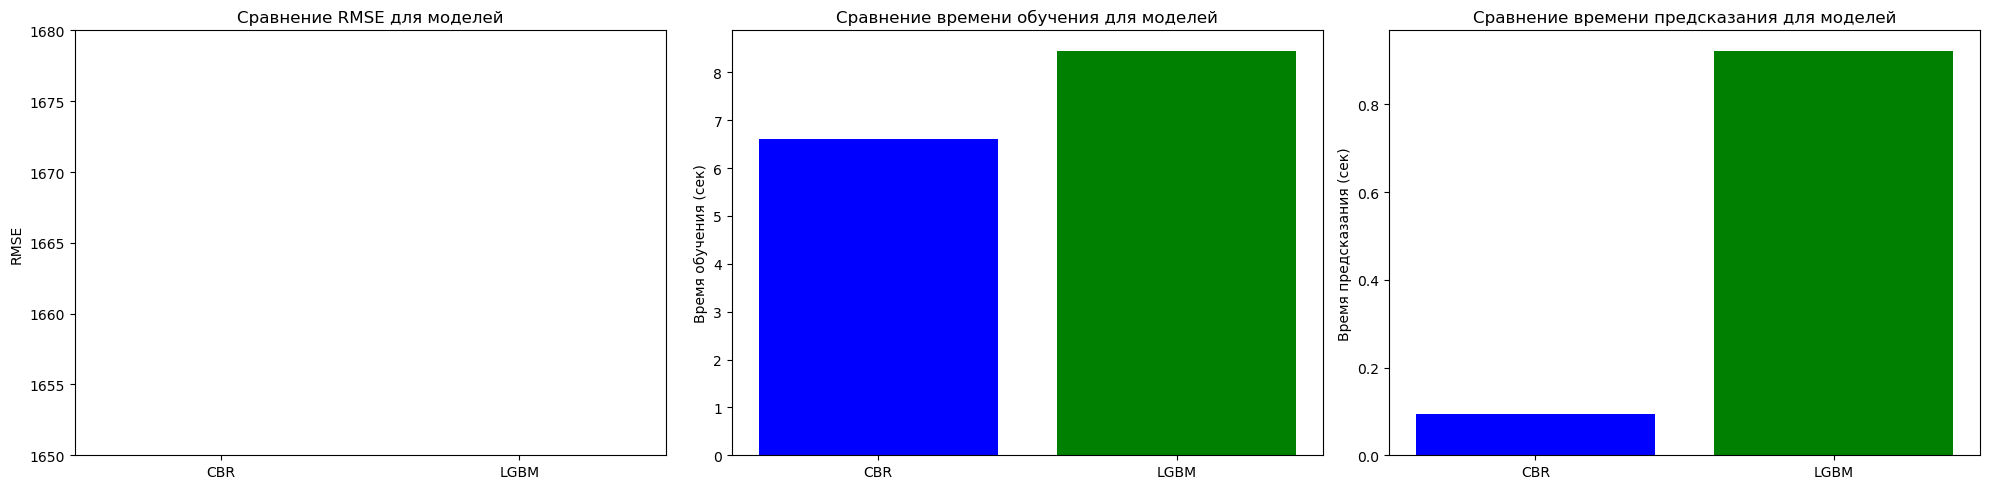

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 1 строка, 3 столбца

# Диаграмма для RMSE
axs[0].bar(data['model'], data['RMSE'], color=['blue', 'green'])
axs[0].set_ylim(1650, 1680)
axs[0].set_ylabel('RMSE')
axs[0].set_title('Сравнение RMSE для моделей')

# Диаграмма для времени обучения
axs[1].bar(data['model'], data['fitting_time'], color=['blue', 'green'])
axs[1].set_ylabel('Время обучения (сек)')
axs[1].set_title('Сравнение времени обучения для моделей')

# Диаграмма для времени предсказания
axs[2].bar(data['model'], data['predict_time'], color=['blue', 'green'])
axs[2].set_ylabel('Время предсказания (сек)')
axs[2].set_title('Сравнение времени предсказания для моделей')

plt.tight_layout()
plt.show()

CatBoost Regressor показал лучший результат по всем показателям. Эта модель лучше всего подходит для решения данной задачи.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

По этому блоку будет несколько важных замечаний:
1. Все модели этого блока оцениваются на тестовой выборке - это преждевременное решение, так как оценка на тестовой выборке - это финальное тестирование для лучшей модели, которая была отобрана в ходе промежуточного тестирования. Эта концепция находит своё отражение в условиях эксплуатации модели в реальной среде: в промышленной эксплуатации не работает несколько моделей одновременно - в промышленную эксплуатацию запускают только одну модель, которая была выбрана из нескольких в ходе промежуточной оценки. Так же и здесь - тестовая выборка имитирует поток реальных данных, и с этим потоком должна работать только одна модель. 


2. Лучшая модель должна быть выбрана по двум критериям - метрика `RMSE` и время работы модели. Далее сценарий работы с моделями в этом блоке зависит от выбранной стратегии валидации и оптимизации гиперпараметров:
- для оптимизации гиперпараметров и промежуточной оценки моделей была выделена валидационная выборка;
- для оптимизации гиперпараметров и промежуточной оценки моделей проводится кросс-валидация.
    
    В первом случае метрика промежуточной оценки модели - это метрика `RMSE` на валидационной выборке, полученная от использования на `valid` лучшей модели, а время - это время обучения модели с лучшими гиперпарметрами на `train` и время совершения ею предсказаний на `valid`.
    
    Во втором случае метрика промежуточной оценким модели - это метрика `RMSE` с кросс-валидации: в случае использования `cross_val_score` - это среднее из массива метрик (длина соответствует количеству фолдов для кросс-валидации), который возвращает инструмент, в случае использования `GridSearchCV` или `RandomizedSearchCV` - это метрика из атрибута `best_score_`. Временем работы лучшей модели может быть время обучения на `train` и время предсказания на `train` выборке (только время, метрика `RMSE` на тренировочной выборке не нужна).
    
    Тут часто студенты делают ошибку, принимая в качестве метрики времени время работы лучшей модели, а время оптимизации гиперпараметров в целом (то есть время выполнения всей ячейки кода цикла с `cross_val_score` или ячейки с `GridSearchCV`) - это некорректный подход: на практике модель не будет каждый раз переобучаться и выполнять оптимизацию гиперпараметров перед очередным предсказанием - сначала будет найдена лучшая модель, а она уже будет использоваться для обучения и предсказаний. Поэтому и в этом случае сначала определяется лучшая модель, а уже потом замеряется время её работы: кросс-валидации как альтернатива времени обучения и предсказания (потому что по сути кросс-валидация объединяет в себе обучение и предсказание) или время обучения и предсказания на `train`.
    
    Независимо от выбранной стратегии кросс-валидации алгоритм работы выглядит как:
- оптимизация гиперпараметров и поиск лучшей модели;
- оценка метрики `RMSE`;
- оценка времени работы лучшей модели: на валидационной выборке (если она выделялась) или на кросс-валидации/тренировочной выборке (если проводилась кросс-валидация).
    
    По итогу нужно будет провести сравнительную характеристику моделей по критериям метрики `RMSE` и времени работы моделей и выбрать лучшую - именно эта лучшая модель должна будет оцениваться на тестовой выборке.
    
3. Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
    В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
    Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.


4. Итоговый вывод нужно поправить.

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Сергей, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.

Работа с моделями также выполнена отлично: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `RandomizedSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец! Круто, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый объект, а также пробуешь в работе разные трансформеры.
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)